In [67]:
#Importing the necessary packages we will need to run this code
import numpy as np
import matplotlib.pyplot as plt
import copy

In [68]:
#ODE is u'=u-u^3-v+k and v'=u-v
def f(Y, t):
    k=1 # Change a,b here to see how modifying these variables affects the phase plane
    y1, y2 = Y
    return [y1-np.power(y1,3)-y2+k, y1-y2]

In [69]:
#Next several cells are defining a meshgrid over which we will solve for the phase plane
#You can display what is in these arrays using display(y1) for example
y1 = np.linspace(-2.0, 2.0, 20)
y2 = np.linspace(-2.0,2.0, 20)

In [70]:
Y1, Y2 = np.meshgrid(y1, y2)

In [71]:
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape

In [72]:
#Calculating the derivatives R(y1)', J(y2)' at each point in the phase plane so that we can make a phase plane plot
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t) #Returns an array of y1' and y2' 
        u[i,j] = yprime[0] #y1'
        v[i,j] = yprime[1] #y2'
     

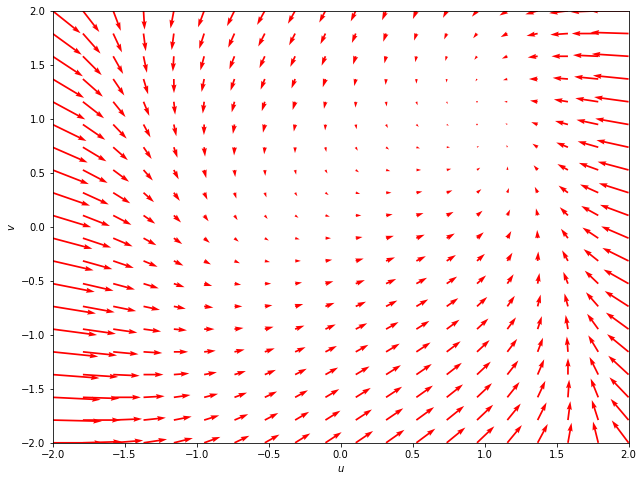

In [73]:
fig1=plt.figure(figsize=(1,1.5))
ax1=fig1.add_axes([0.,0.,8.,4.])
#Quiver plots an arrow describing the magnitude and direction at each point, that is 
#y1'/y2' which is u/v
Q=ax1.quiver(Y1, Y2, u, v, color='r') 
ax1.set_xlabel('$u$')
ax1.set_ylabel('$v$')
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
fig1.savefig('phase-portrait-FitzHughNagumo.png')




In [74]:
#Need odeint
from scipy.integrate import odeint

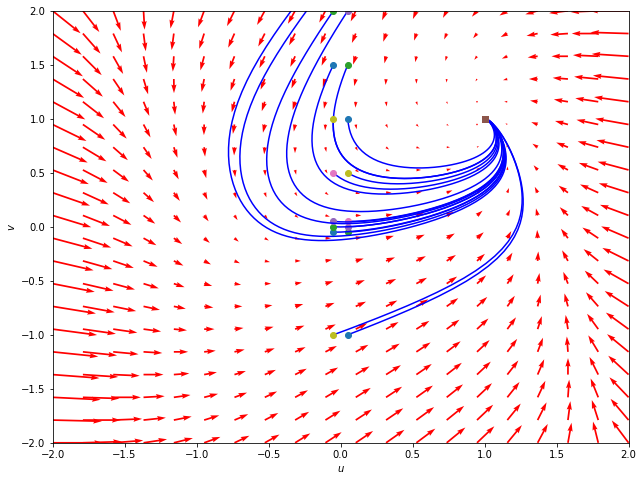

In [75]:
#This cell plots trajectories over the quiver plot by actually numerically solving the system of ODEs using odeint
ax2=fig1.add_axes([0.,0.,8.,4.])

for y20 in [-1.0,-.05, 0,0.05, 0.5, 1, 1.5, 2, 2.5]: #Different initial starting conditions. y1 is always 1.5, y2 starts at 0-2.5
    tspan = np.linspace(0, 10, 200) #time
    y0 = [0.05, y20]
    ys = odeint(f, y0, tspan)
    ax2.plot(ys[:,0], ys[:,1], 'b-') # path
    ax2.plot([ys[0,0]], [ys[0,1]], 'o') # start (initial condition) denoted with a o on the plot
    ax2.plot([ys[-1,0]], [ys[-1,1]], 's') # end (at t=200) denoted by a square on the plot
    ax2.set_xlim([-2, 2])


for y20 in [-1.0,-.05, 0,0.05, 0.5, 1, 1.5, 2, 2.5]: #Different initial starting conditions. y1 is always 1.5, y2 starts at 0-2.5
    tspan = np.linspace(0, 10, 200) #time
    y0 = [-0.05, y20]
    ys = odeint(f, y0, tspan)
    ax2.plot(ys[:,0], ys[:,1], 'b-') # path
    ax2.plot([ys[0,0]], [ys[0,1]], 'o') # start (initial condition) denoted with a o on the plot
    ax2.plot([ys[-1,0]], [ys[-1,1]], 's') # end (at t=200) denoted by a square on the plot
    ax2.set_xlim([-2, 2])
fig1.savefig('phase-portrait-2-FitzHughNagumo.png')
fig1.savefig('phase-portrait-2-FitzHughNagumo.png', bbox_inches='tight')
fig1.savefig('phase-portrait-2-FitzHughNagumo.eps', bbox_inches='tight')
fig1

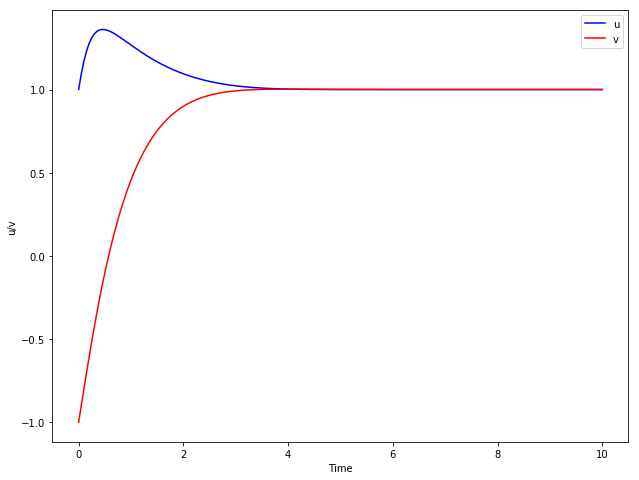

In [76]:
#What do these look like in time?
fig2=plt.figure(figsize=(1,1.5))
ax2=fig2.add_axes([0.,0.,8.,4.])
tspan = np.linspace(0, 10, 200) #time
y0 = [1.0, -1.0]
ys = odeint(f, y0, tspan)
ax2.plot(tspan,ys[:,0], 'b-') #Romeo
ax2.plot(tspan, ys[:,1],'r-') #Juliet
ax2.set_xlabel('Time')
ax2.set_ylabel('u/v')
ax2.legend(['u','v'])





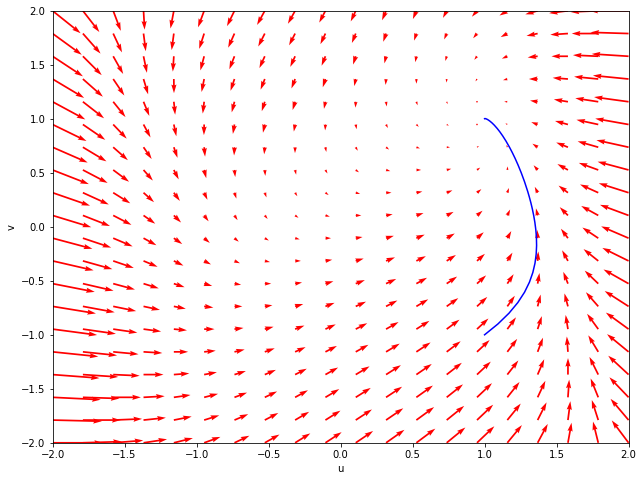

In [77]:
#Compare to what the trajector looks like on the phase plot

#Replot a nice clear phase plane
fig3=plt.figure(figsize=(1,1.5))
ax3=fig3.add_axes([0.,0.,8.,4.])
#Quiver plots an arrow describing the magnitude and direction at each point, that is 
#y1'/y2' which is u/v
Q=ax3.quiver(Y1, Y2, u, v, color='r') 
ax3.set_xlabel('u')
ax3.set_ylabel('v')
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])
ax3.plot(ys[:,0], ys[:,1], 'b-') # path
